## import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Import data

In [2]:
df = pd.read_csv('Books.csv')
df.head(n = 5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,41258,Raised on Rock: Growing Up at Graceland,David Stanley/Mark Bego,2.75,1851588523,9.780000e+12,eng,192,4,0,01/12/1931,Trafalgar Square Publishing,NaN
1,12292,Murder from the East,Carroll John Daly,3.63,930330013,9.780000e+12,eng,312,15,4,01/01/1935,International Polygonics,NaN
2,42425,For Whom the Bell Tolls,Ernest Hemingway,3.97,1117066037,9.780000e+12,eng,503,365,33,01/01/1940,P. F. Collier and Sons,NaN
3,7905,Betsy and Tacy Go Downtown (Betsy-Tacy #4),Maud Hart Lovelace/Lois Lenski,4.21,690134495,9.780000e+12,eng,180,70,7,01/01/1943,Thomas Y. Crowell Company,NaN
4,7777,McElligot's Pool,Dr. Seuss,4.06,394800834,9.780000e+12,eng,64,4560,253,12/09/1947,Random House Books for Young Readers,NaN


## Find out what columns are in the data

In [3]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

## Find out the column data types

In [4]:
df.columns
dataTypeSeries = df.dtypes

print(dataTypeSeries)

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
Unnamed: 12            object
dtype: object


## Remove unwanted columns and save to a dataframe

In [5]:
CleanData = df.drop(['Unnamed: 12'], axis = 1)
CleanData_df = pd.DataFrame(CleanData)
CleanData_df.head(n = 5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,41258,Raised on Rock: Growing Up at Graceland,David Stanley/Mark Bego,2.75,1851588523,9.780000e+12,eng,192,4,0,01/12/1931,Trafalgar Square Publishing
1,12292,Murder from the East,Carroll John Daly,3.63,930330013,9.780000e+12,eng,312,15,4,01/01/1935,International Polygonics
2,42425,For Whom the Bell Tolls,Ernest Hemingway,3.97,1117066037,9.780000e+12,eng,503,365,33,01/01/1940,P. F. Collier and Sons
3,7905,Betsy and Tacy Go Downtown (Betsy-Tacy #4),Maud Hart Lovelace/Lois Lenski,4.21,690134495,9.780000e+12,eng,180,70,7,01/01/1943,Thomas Y. Crowell Company
4,7777,McElligot's Pool,Dr. Seuss,4.06,394800834,9.780000e+12,eng,64,4560,253,12/09/1947,Random House Books for Young Readers


## Count how many books each author has

In [6]:
authors = CleanData['authors']
booksbyauthorscount = authors.value_counts()
booksbyauthorscount

Stephen King                            40
P.G. Wodehouse                          39
Rumiko Takahashi                        39
Orson Scott Card                        35
Agatha Christie                         33
                                        ..
Matthew Barber/Elizabeth von Arnim       1
Eoin Colfer/Nathaniel Parker             1
P.J. Tracy                               1
Rosamunde Pilcher                        1
Gayle Lynds/Robert Ludlum/Don Leslie     1
Name: authors, Length: 6636, dtype: int64

## Save Count to a Data Frame

In [7]:
booksbyauthorscount_df = pd.DataFrame(booksbyauthorscount)
booksbyauthorscount_df

,authors
Stephen King,40
P.G. Wodehouse,39
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
...,...
Matthew Barber/Elizabeth von Arnim,1
Eoin Colfer/Nathaniel Parker,1
P.J. Tracy,1
Rosamunde Pilcher,1


## rename column to reflect that it is a count

In [8]:
booksbyauthorscount_df.rename(columns = {'authors': 'number of books by author'}, inplace=True)
booksbyauthorscount_df

,number of books by author
Stephen King,40
P.G. Wodehouse,39
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
...,...
Matthew Barber/Elizabeth von Arnim,1
Eoin Colfer/Nathaniel Parker,1
P.J. Tracy,1
Rosamunde Pilcher,1


## look up top ten authors with the most books and save to a dataframe

In [9]:
topptenmostbooks = booksbyauthorscount_df.nlargest(10,'number of books by author')
topptenmostbooks_df = pd.DataFrame(topptenmostbooks)
topptenmostbooks_df

,number of books by author
Stephen King,40
P.G. Wodehouse,39
Rumiko Takahashi,39
Orson Scott Card,35
Agatha Christie,33
Piers Anthony,30
Mercedes Lackey,29
Sandra Brown,29
Dick Francis,28
Terry Pratchett,23


## plot a graph for number of books by author

<AxesSubplot:>

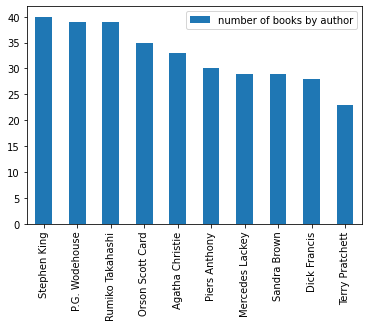

In [10]:
topptenmostbooks_df.plot.bar()

## Look up titles by the author with the most books

In [11]:
StephenKing = CleanData.loc[CleanData['authors']=='Stephen King']
StephenKing.head(n = 5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
117,19137,'Salem's Lot,Stephen King,4.02,451098277,9.780000e+12,eng,817,18,3,01/08/1976,Signet
118,36303,'Salem's Lot,Stephen King,4.02,451139690,9.780000e+12,eng,427,186,22,01/08/1976,Signet
160,10613,Night Shift,Stephen King,4.00,451170113,9.780000e+12,en-US,326,1290,84,01/02/1979,Signet
182,11588,The Shining,Stephen King,4.22,450040186,9.780000e+12,eng,659,978535,15105,01/07/1980,New English Library (Hodder & Stoughton)
245,33348,Different Seasons,Stephen King,4.35,708823602,9.780000e+12,en-GB,560,188,24,01/10/1983,Futura


## Sort Stephen King Books by Average Ratings

In [12]:
StephenKingBookRatings = StephenKing.sort_values(by = ['average_rating'], ascending = False)
StephenKingBookRatings.head(n = 5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
3062,5417,Carrie / 'Salem's Lot / The Shining,Stephen King,4.54,517219026,9.780000e+12,eng,1096,13137,61,02/07/2002,Wings
1338,11566,The Green Mile,Stephen King,4.44,451933028,9.780000e+12,eng,592,207869,4570,01/09/1996,Penguin Signet
245,33348,Different Seasons,Stephen King,4.35,708823602,9.780000e+12,en-GB,560,188,24,01/10/1983,Futura
8187,39662,Different Seasons,Stephen King,4.35,751514624,9.780000e+12,eng,560,127648,2080,2/16/1995,Warner Books
2668,11584,On Writing: A Memoir,Stephen King,4.33,340820462,9.780000e+12,eng,384,1118,142,01/09/2001,New English Library


## Plot graph to show ratings of Stephen King books

<AxesSubplot:xlabel='title'>

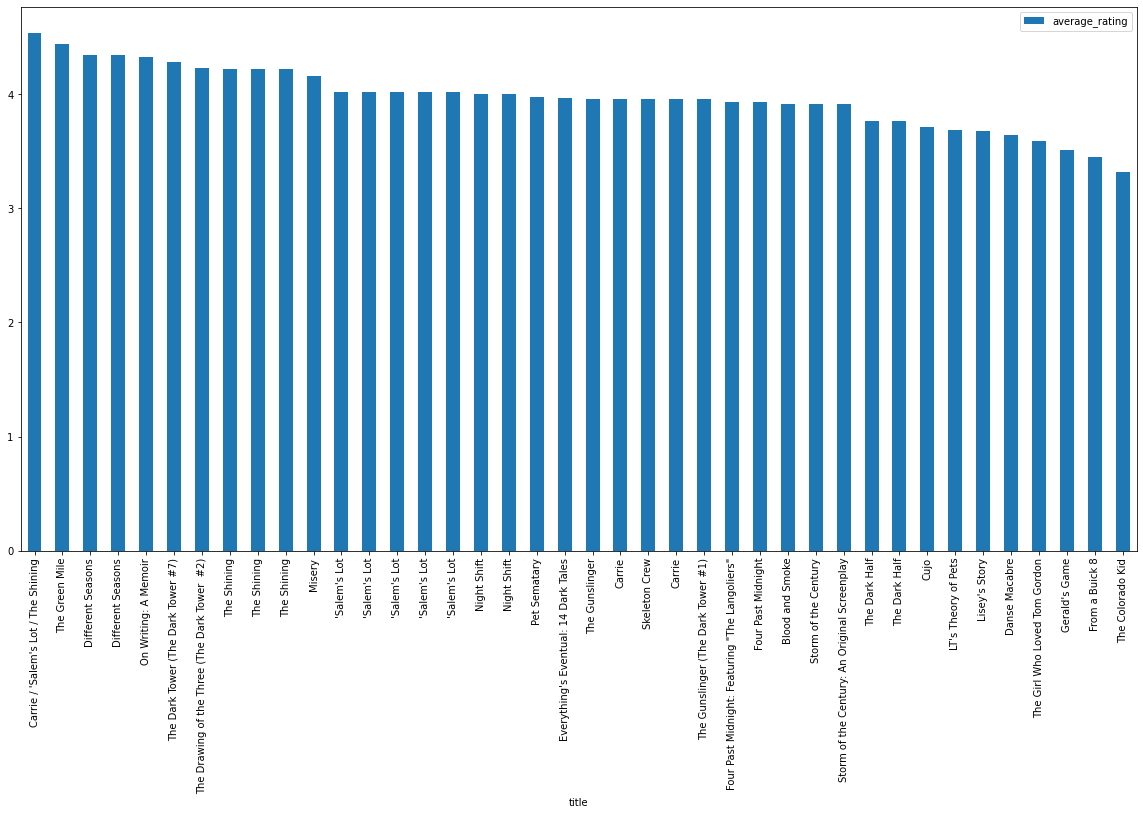

In [13]:
StephenKingBookRatings.plot(x="title", y=["average_rating"], kind="bar", figsize=(20, 10))

## Look at books and average ratings

In [14]:
BookRatings = CleanData[['title','average_rating']]
BookRatings

,title,average_rating
0,Raised on Rock: Growing Up at Graceland,2.75
1,Murder from the East,3.63
2,For Whom the Bell Tolls,3.97
3,Betsy and Tacy Go Downtown (Betsy-Tacy #4),4.21
4,McElligot's Pool,4.06
...,...,...
11112,Tan fuerte tan cerca,3.98
11113,The Altman Code (Covert-One #4),3.95
11114,Human Traces,3.63
11115,Armageddon's Children (Genesis of Shannara #1),4.10


## Look at authors and average ratings

In [15]:
AuthorRatings = CleanData[['authors','average_rating']]
AuthorRatings

,authors,average_rating
0,David Stanley/Mark Bego,2.75
1,Carroll John Daly,3.63
2,Ernest Hemingway,3.97
3,Maud Hart Lovelace/Lois Lenski,4.21
4,Dr. Seuss,4.06
...,...,...
11112,Jonathan Safran Foer,3.98
11113,Gayle Lynds/Robert Ludlum/Don Leslie,3.95
11114,Sebastian Faulks,3.63
11115,Terry Brooks,4.10


## Sort authors by average rating

In [16]:
AuthorsSortedByRatings = AuthorRatings.sort_values(by =['average_rating'], ascending = False)
AuthorsSortedByRatings

,authors,average_rating
7036,Sheri Rose Shepherd,5.0
8267,Aristophanes/F.W. Hall/W.M. Geldart,5.0
2196,James E. Campbell,5.0
8419,William C. Dowling,5.0
1206,NOT A BOOK,5.0
...,...,...
5735,Jasmine C.M. Luk/Angel M.Y. Lin,0.0
344,Warren G. Bennis,0.0
8061,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,0.0
1267,John Weld/Phil Interlandi,0.0


## Look at what languages books were published in and save to a data frame

In [17]:
languages = CleanData['language_code']
booksbylanguagescount = languages.value_counts()

booksbylanguagescount_df = pd.DataFrame(booksbylanguagescount)
booksbylanguagescount_df.head(n = 5)

,language_code
eng,8904
en-US,1406
spa,218
en-GB,214
fre,144


## rename column

In [18]:
booksbylanguagescount_df.rename(columns = {'language_code': 'number of books by language'}, inplace=True)
booksbylanguagescount_df

,number of books by language
eng,8904
en-US,1406
spa,218
en-GB,214
fre,144
ger,99
jpn,46
mul,19
zho,14
grc,11


## give all versions of English the same name

In [19]:
NewCleanData = CleanData.replace(to_replace =["en-US","en-GB","en-CA"],value ="eng")
NewCleanData


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,41258,Raised on Rock: Growing Up at Graceland,David Stanley/Mark Bego,2.75,1851588523,9.780000e+12,eng,192,4,0,01/12/1931,Trafalgar Square Publishing
1,12292,Murder from the East,Carroll John Daly,3.63,930330013,9.780000e+12,eng,312,15,4,01/01/1935,International Polygonics
2,42425,For Whom the Bell Tolls,Ernest Hemingway,3.97,1117066037,9.780000e+12,eng,503,365,33,01/01/1940,P. F. Collier and Sons
3,7905,Betsy and Tacy Go Downtown (Betsy-Tacy #4),Maud Hart Lovelace/Lois Lenski,4.21,690134495,9.780000e+12,eng,180,70,7,01/01/1943,Thomas Y. Crowell Company
4,7777,McElligot's Pool,Dr. Seuss,4.06,394800834,9.780000e+12,eng,64,4560,253,12/09/1947,Random House Books for Young Readers
...,...,...,...,...,...,...,...,...,...,...,...,...
11112,9862,Tan fuerte tan cerca,Jonathan Safran Foer,3.98,8426415164,9.790000e+12,eng,457,47,1,9/30/2005,Lumen
11113,31270,The Altman Code (Covert-One #4),Gayle Lynds/Robert Ludlum/Don Leslie,3.95,1593978863,9.780000e+12,eng,0,5,1,9/30/2005,Audio Renaissance
11114,7477,Human Traces,Sebastian Faulks,3.63,375502262,9.780000e+12,eng,563,39,12,9/30/2006,Random House (NY)
11115,15549,Armageddon's Children (Genesis of Shannara #1),Terry Brooks,4.10,345484088,9.780000e+12,eng,371,12609,524,9/30/2006,Ballantine Books


## look at books by languages again and save to dataframe

In [20]:
languages = NewCleanData['language_code']
booksbylanguagescount = languages.value_counts()

booksbylanguagescount_df = pd.DataFrame(booksbylanguagescount)
booksbylanguagescount_df

,language_code
eng,10531
spa,218
fre,144
ger,99
jpn,46
mul,19
zho,14
grc,11
por,10
ita,5


## plot a graph for number of books by language

<AxesSubplot:>

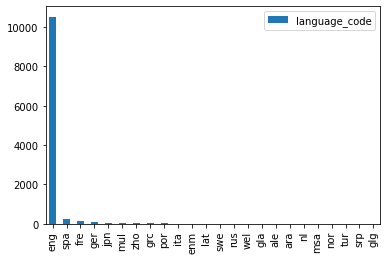

In [21]:
booksbylanguagescount_df.plot.bar()

## convert publication date column type to datetime

In [22]:
CleanData_df['publication_datetimed1'] = pd.to_datetime(CleanData_df['publication_date'], format="%m/%d/%y", errors='coerce')
CleanData_df['publication_datetimed2'] = pd.to_datetime(CleanData_df['publication_date'], format="%m/%d/%Y", errors='coerce')
CleanData_df['publication_datecombo'] = CleanData_df[['publication_datetimed1','publication_datetimed2']].bfill(axis=1).iloc[:, 0]

year = pd.DatetimeIndex(CleanData_df['publication_datecombo']).year 
#if year.any() > 2021: 
CleanData_df['publication_datecombo'] = CleanData_df['publication_datecombo'].mask(CleanData_df['publication_datecombo'].dt.year > 2021,CleanData_df['publication_datecombo'] - pd.DateOffset(years=100))

#subset['publication_datecombo'] = pd.Timedelta(pd.offsets.year(1000))
#print(df.dtypes)
CleanData_df.head(n=5)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_datetimed1,publication_datetimed2,publication_datecombo
0,41258,Raised on Rock: Growing Up at Graceland,David Stanley/Mark Bego,2.75,1851588523,9.780000e+12,eng,192,4,0,01/12/1931,Trafalgar Square Publishing,NaT,1931-01-12,1931-01-12
1,12292,Murder from the East,Carroll John Daly,3.63,930330013,9.780000e+12,eng,312,15,4,01/01/1935,International Polygonics,NaT,1935-01-01,1935-01-01
2,42425,For Whom the Bell Tolls,Ernest Hemingway,3.97,1117066037,9.780000e+12,eng,503,365,33,01/01/1940,P. F. Collier and Sons,NaT,1940-01-01,1940-01-01
3,7905,Betsy and Tacy Go Downtown (Betsy-Tacy #4),Maud Hart Lovelace/Lois Lenski,4.21,690134495,9.780000e+12,eng,180,70,7,01/01/1943,Thomas Y. Crowell Company,NaT,1943-01-01,1943-01-01
4,7777,McElligot's Pool,Dr. Seuss,4.06,394800834,9.780000e+12,eng,64,4560,253,12/09/1947,Random House Books for Young Readers,NaT,1947-12-09,1947-12-09


## Check that the datatype has been changed

In [23]:
print(CleanData_df.dtypes)

bookID                             int64
title                             object
authors                           object
average_rating                   float64
isbn                              object
isbn13                           float64
language_code                     object
  num_pages                        int64
ratings_count                      int64
text_reviews_count                 int64
publication_date                  object
publisher                         object
publication_datetimed1    datetime64[ns]
publication_datetimed2    datetime64[ns]
publication_datecombo     datetime64[ns]
dtype: object


## Remove the original date column and columns created during the datatype conversion process and save to a dataframe

In [24]:
CleanData2_df = CleanData_df.drop(['publication_datetimed1','publication_datetimed2','publication_date'], axis = 1)
CleanData_df = pd.DataFrame(CleanData_df)
CleanData2_df.head (n=5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_datecombo
0,41258,Raised on Rock: Growing Up at Graceland,David Stanley/Mark Bego,2.75,1851588523,9.780000e+12,eng,192,4,0,Trafalgar Square Publishing,1931-01-12
1,12292,Murder from the East,Carroll John Daly,3.63,930330013,9.780000e+12,eng,312,15,4,International Polygonics,1935-01-01
2,42425,For Whom the Bell Tolls,Ernest Hemingway,3.97,1117066037,9.780000e+12,eng,503,365,33,P. F. Collier and Sons,1940-01-01
3,7905,Betsy and Tacy Go Downtown (Betsy-Tacy #4),Maud Hart Lovelace/Lois Lenski,4.21,690134495,9.780000e+12,eng,180,70,7,Thomas Y. Crowell Company,1943-01-01
4,7777,McElligot's Pool,Dr. Seuss,4.06,394800834,9.780000e+12,eng,64,4560,253,Random House Books for Young Readers,1947-12-09


## Isolate years and create new column

In [25]:
CleanData2_df['year'] = pd.DatetimeIndex(CleanData2_df['publication_datecombo']).year
CleanData2_df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_datecombo,year
0,41258,Raised on Rock: Growing Up at Graceland,David Stanley/Mark Bego,2.75,1851588523,9.780000e+12,eng,192,4,0,Trafalgar Square Publishing,1931-01-12,1931.0
1,12292,Murder from the East,Carroll John Daly,3.63,930330013,9.780000e+12,eng,312,15,4,International Polygonics,1935-01-01,1935.0
2,42425,For Whom the Bell Tolls,Ernest Hemingway,3.97,1117066037,9.780000e+12,eng,503,365,33,P. F. Collier and Sons,1940-01-01,1940.0
3,7905,Betsy and Tacy Go Downtown (Betsy-Tacy #4),Maud Hart Lovelace/Lois Lenski,4.21,690134495,9.780000e+12,eng,180,70,7,Thomas Y. Crowell Company,1943-01-01,1943.0
4,7777,McElligot's Pool,Dr. Seuss,4.06,394800834,9.780000e+12,eng,64,4560,253,Random House Books for Young Readers,1947-12-09,1947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112,9862,Tan fuerte tan cerca,Jonathan Safran Foer,3.98,8426415164,9.790000e+12,eng,457,47,1,Lumen,2005-09-30,2005.0
11113,31270,The Altman Code (Covert-One #4),Gayle Lynds/Robert Ludlum/Don Leslie,3.95,1593978863,9.780000e+12,eng,0,5,1,Audio Renaissance,2005-09-30,2005.0
11114,7477,Human Traces,Sebastian Faulks,3.63,375502262,9.780000e+12,en-US,563,39,12,Random House (NY),2006-09-30,2006.0
11115,15549,Armageddon's Children (Genesis of Shannara #1),Terry Brooks,4.10,345484088,9.780000e+12,eng,371,12609,524,Ballantine Books,2006-09-30,2006.0


## show number of books published per year

In [26]:
booksbyyear_df = CleanData2_df['year'].value_counts().sort_index()
booksbyyear_df

1922.0    1
1931.0    1
1935.0    1
1940.0    1
1943.0    1
         ..
2017.0    7
2018.0    5
2019.0    7
2020.0    1
2021.0    2
Name: year, Length: 79, dtype: int64

## plot number of books published by year

<AxesSubplot:>

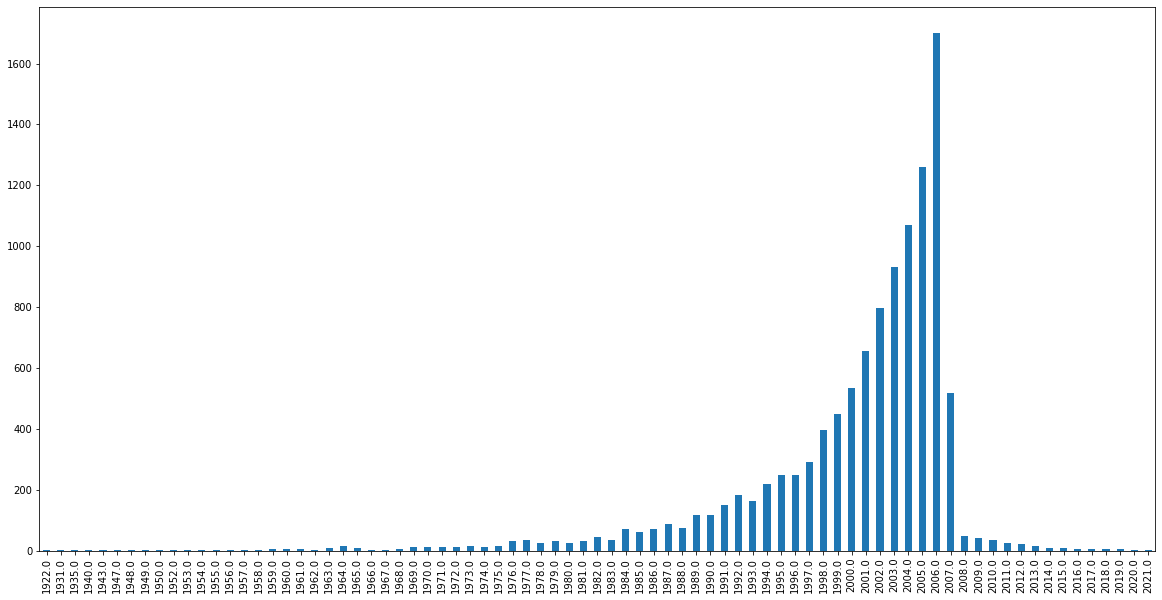

In [27]:
booksbyyear_df.plot.bar(x="year",y="number of books",figsize=(20,10))

## show number of books published per year

In [28]:
booksbydecade_df = CleanData2_df['year'].value_counts(bins=10).sort_index()
booksbydecade_df
#booksbyyear_df.plot(title="books published by decade", x="year", y=["number of books published"], kind="bar", figsize=(20, 10))

(1921.9, 1931.9]       2
(1931.9, 1941.8]       2
(1941.8, 1951.7]       8
(1951.7, 1961.6]      38
(1961.6, 1971.5]      86
(1971.5, 1981.4]     236
(1981.4, 1991.3]     837
(1991.3, 2001.2]    3393
(2001.2, 2011.1]    6428
(2011.1, 2021.0]      85
Name: year, dtype: int64

## plot number of books published by decade

<AxesSubplot:title={'center':'books published by decade'}>

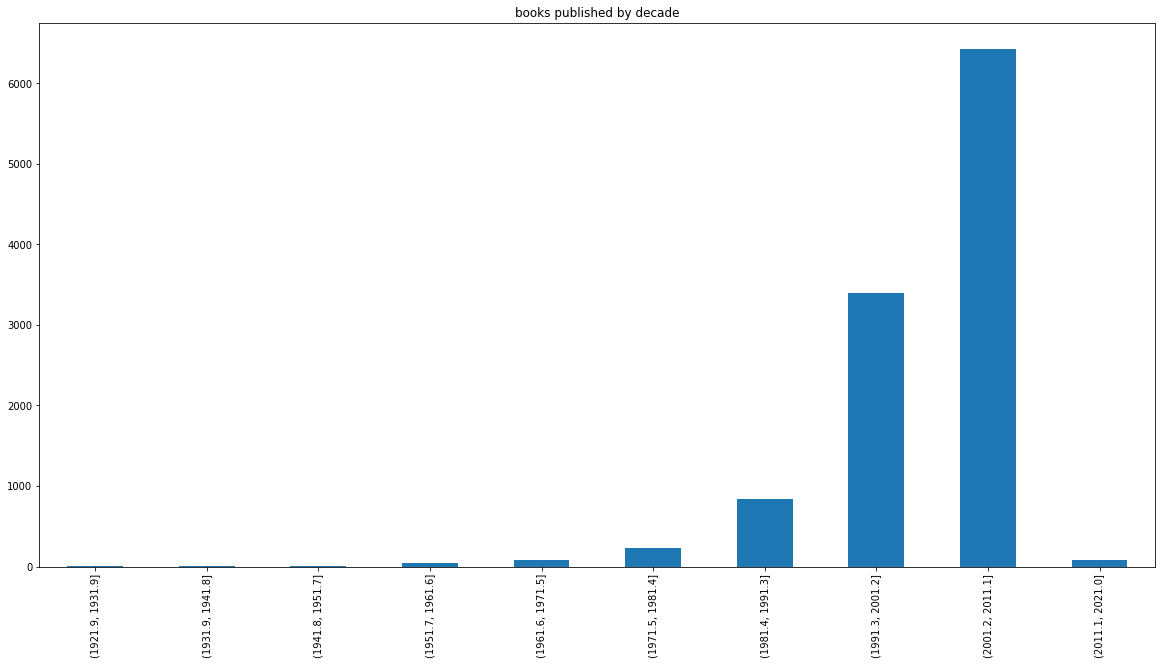

In [29]:
booksbydecade_df.plot(title="books published by decade", x="year", y=["number of books published"], kind="bar", figsize=(20, 10))

## test matplotlib

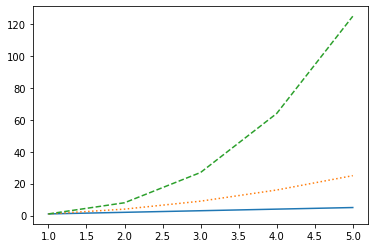

In [30]:
from matplotlib import pyplot as plt 
x1=[1,2,3,4,5]
y1=[1,2,3,4,5]
x2=[1,2,3,4,5]
y2=[1,4,9,16,25]
x3=[1,2,3,4,5]
y3=[1,8,27,64,125]
plt.plot(x1,y1, linestyle='solid', label='y=x')
plt.plot(x2,y2,linestyle='dotted', label='y=x^2')
plt.plot(x3,y3, linestyle='dashed', label='y=x^3')
plt.show()

## using matplotlib for plotting book rating vs year published

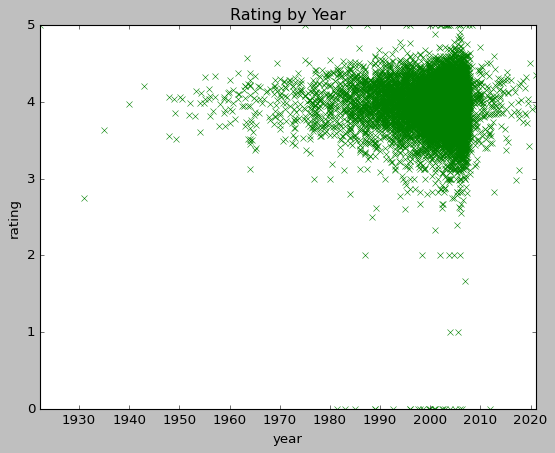

In [31]:
from matplotlib import pyplot as plt 
plt.style.use('classic')
x = CleanData_df.publication_datecombo
y = CleanData_df.average_rating
plt.plot(x, y, color='green', marker='x',linewidth=0) 
plt.title('Rating by Year')
plt.xlabel('year')
plt.ylabel('rating')
plt.show()

## simple numpy array use

In [32]:
import numpy as np
text_reviews_array = np.array(CleanData_df.text_reviews_count)
print("||| total number of text reviews |||")
print("dtype:",text_reviews_array.dtype)
text_reviews_total = np.sum(text_reviews_array)
print(text_reviews_total)

total_entries = len(CleanData_df.index)
print ("||| total entries in dataframe |||")
print(total_entries)

print("||| average reviews per entry |||")
reviews_per_entry = (text_reviews_total / total_entries)
print(reviews_per_entry)



||| total number of text reviews |||
dtype: int64
6029133
||| total entries in dataframe |||
11117
||| average reviews per entry |||
542.3345326976703


## simple dictionary use

In [33]:
authorsborn_dictionary = {
    "JK Rowling": 'Yate, United Kingdom',
    'Willian T.Vollmann' : 'Los Angeles, United States',
    'Mark Twain' : 'Florida, United States',   
    'John Diamond': 'Hackney, United Kingdom',
    'Keith Donohue': 'Pittsburgh, United States',
    'James Craig Holte': 'Staten Island, United States',
}

print("Where was James Craig Holte born?")
authorsborn_dictionary['James Craig Holte']

Where was James Craig Holte born?


'Staten Island, United States'